# 결정트리

- 분류 회귀
- 입력데이터를 여러 기준으로 분류, 각 분할이 순수한(동일한 클래스)의 하위집합을 만들도록 설계된 알고리즘
- 노드(node) 데이터의 특정 특징에대한 조건을 나타낸다 --> 말단노드가 최종 분류
    - 루트 노드
    - 내부 노드
    - 말단 노드
- 데이터 분할 기준 - 분류문제
    - 정보이득 
        - 엔트로피의 차이를 이용
    - 지니계수
        - 특정클래스에서 클래스가 얼마나 잘 분리되는지를 측정하는 지표
- 적용가능한 데이터
    - 정보이득(엔트로피기반) : 다수의 클래스를 분류 , 클래스 불균형이 있는 데이터  90% A 클래스 나머지... 
        - 의료진단 데이터
        - 이상탐지 데이터
    - 지니계수는 : 이진분류
- 분산감소
    - 회귀문제 사용
    - 노드에 있는 데이터들의 분산을 최소화 하는 방향
- 각 노드의 분할기준을 선정하기때문에.. 해당모델을 학습을 하면 피처들간의 중요도를 파악할 수 있음

In [1]:
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine
wine =  load_wine()

In [3]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=[
    'Alcohol',
    'Malic acid',
     'Ash',
     'Alcalinity of ash',
     'Magnesium',
     'Total phenols',
     'Flavanoids',
     'Nonflavanoid phenols',
     'Proanthocyanins',
     'Color intensity',
     'Hue',
     'OD280/OD315 of diluted wines',
     'Proline'
])
df['target'] = wine.target
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  targe

In [13]:
# 로지스틱 회귀를 사용했을 때
from sklearn.model_selection import train_test_split
X = df.drop('target',axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
y_train_ss = ss.fit_transform(y_train)
x_test_ss = ss.fit_transform(x_test)
y_test_ss = ss.fit_transform(y_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_ss, y_train_ss)
print(lr.predict(x_test,y_test))
print(lr.score(x_test_ss,y_test_ss))

NameError: name 'x_train_ss' is not defined

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
help (DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [59]:
tree = DecisionTreeClassifier(criterion ='entropy') # max_depth # 클래스 불균형이 심할 때 유리함
# tree = DecisionTreeClassifier(criterion ='gini')

In [60]:
x = df.drop('target', axis=1)
y = df['target']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y, random_state=42)

In [62]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
x_train.shape

(133, 13)

In [64]:
df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [65]:
import matplotlib.pylab as plt
from sklearn.tree import plot_tree

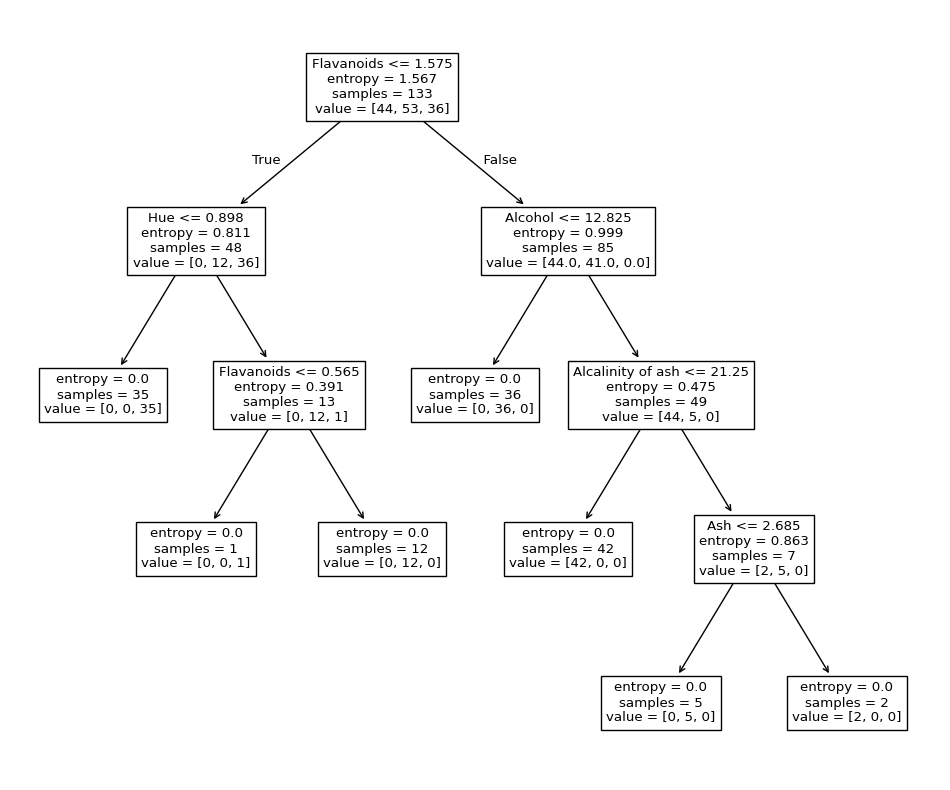

In [66]:
plt.figure(figsize=(12,10))
plot_tree(tree, feature_names=x_train.columns)
plt.show()

In [67]:
import numpy as np
temp = np.array([1,5,7,3,2])
# print(temp)
# temp = sorted(temp,reverse=True)
# print(temp)
temp = np.argsort(temp)[::-1]
print(temp)

[2 1 3 4 0]


In [77]:
print(tree.feature_importances_)
indexs = np.argsort(tree.feature_importances_)[::-1]
df.columns[indexs]

[0.3699289  0.         0.         0.         0.         0.
 0.3959596  0.         0.         0.14591195 0.01851852 0.
 0.06968103]


Index(['Flavanoids', 'Alcohol', 'Color intensity', 'Proline', 'Hue',
       'Proanthocyanins', 'OD280/OD315 of diluted wines', 'Total phenols',
       'Nonflavanoid phenols', 'Magnesium', 'Alcalinity of ash', 'Ash',
       'Malic acid'],
      dtype='object')

In [69]:
tree.score(x_test,y_test)

0.8888888888888888

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.93      0.78      0.85        18
           2       0.92      0.92      0.92        12

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



# 클래스 불균형

- 언더샘플링 : 
    - 다수의 클래스를 무작위로 제거해서 소수의 클래스의 수에 맞게 자르는 방법
    - 중요한 특성을 소실할 수 있다. 즉, 정보손실
- 오버샘플링
    - 소수의 클래스를 다수의 크기만큼 증가(복제)
        - 복제 또는 병합
        - 고적합이 일어날 수 있음
- SMOTE
    - 새로운 소수의 클래스를 단순 증가가 아니라 새롭게 생성
        -  소스 클래스의 샘플을 기준으로 보간(선형)을 사용해서 새로운 샘플을 만든다 - 과적합 방지
        - 새로운 샘플이 실제 데이터의 분포를 왜곡할 가능성이 있음
        - 추정 : 선형, poly, 스플릿, k-최근접 이웃 보간이 있음
- 앙상블 기법
    - 머신러닝을 이용해서 없는 데이터를 회귀로 예측
        - 랜덤 포레스트 : 클래스 불균형에 우수한 성능
- 클래스 가중치 조정
    - 모델을 학습할 때 손실함수에 클래스에 대한 가중치를 부여할 때 다수 클래스보다 소수 클래스의 오류에 더 큰 패널티를 부여하는 방법
- 하이브리드 방법
    - 언더와 오버샘플링을 조합
        - 다수 클래스는 언더샘플링, 소수 클래스 SMOTE와 같은 오버 샘플링 기법
    - 단점 : 복잡하다

In [71]:
!pip install imblearn

In [72]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y_train)) # 딕셔너리로 표시
rds = RandomUnderSampler(random_state=42)
x_train_resample, y_train_resample = rds.fit_resample(x_train,y_train)
print(Counter(y_train_resample))

Counter({1: 53, 0: 44, 2: 36})
Counter({0: 36, 1: 36, 2: 36})


In [73]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print(Counter(y_train)) # 딕셔너리로 표시
rds = RandomOverSampler(random_state=42)
x_train_resample, y_train_resample = rds.fit_resample(x_train,y_train)
print(Counter(y_train_resample))

Counter({1: 53, 0: 44, 2: 36})
Counter({0: 53, 1: 53, 2: 53})


In [74]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(Counter(y_train))
rds = SMOTE(random_state=42)
x_train_resample,y_train_resample = rds.fit_resample(x_train,y_train)
print(Counter(y_train_resample))

Counter({1: 53, 0: 44, 2: 36})
Counter({0: 53, 1: 53, 2: 53})


In [75]:
help(SMOTE)

Help on class SMOTE in module imblearn.over_sampling._smote.base:

class SMOTE(BaseSMOTE)
 |  SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
 |
 |  Class to perform over-sampling using SMOTE.
 |
 |  This object is an implementation of SMOTE - Synthetic Minority
 |  Over-sampling Technique as presented in [1]_.
 |
 |  Read more in the :ref:`User Guide <smote_adasyn>`.
 |
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, default='auto'
 |      Sampling information to resample the data set.
 |
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
 |        number of samples in the minority class after resampling and
 |        :math:`N_{M}` is the number of samples in the 

In [76]:
tree = DecisionTreeClassifier(criterion = 'gini')
tree.fit(x_train_resample, y_train_resample)
print(classification_report(y_test, tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

